# Algebra lineal y cuántica

Deseamos introducir los siguientes conceptos.
* Estados aleatorios
* Proyectores
* Matrices de Pauli
* Matriz de densidad


# Definiciones basicas de vectores y algunas operaciones

In [1]:
v=[1 2 3] # esto es un covector

1x3 Array{Int64,2}:
 1  2  3

In [2]:
typeof(v)

Array{Int64,2}

In [3]:
# Este es un vector usual, dependiendo de la convencion que sigamos podemos tener
# mas o menos cuidado. Ayuda al principio ser un poco ordenado
v=[1,2,3.2+2im]

3-element Array{Complex{Float64},1}:
 1.0+0.0im
 2.0+0.0im
 3.2+2.0im

In [4]:
a=v' #Transposición conjugada, es decir la operacion daga o pasar de bra a ket.

1x3 Array{Complex{Float64},2}:
 1.0-0.0im  2.0-0.0im  3.2-2.0im

In [5]:
# Producto punto usual, notese que toma el conjugado y luego el producto, por lo 
# que tenemos que el producto es real y positivo
dot(v,v)

19.240000000000002 + 0.0im

In [6]:
# Este es el producto exterior. Es el resultando de un ket por un bra 
# (que es diferente de un bra por un ket), y me da un proyector. Exploraremos
# un poco mas profundamente este concepto
v*v' 

3x3 Array{Complex{Float64},2}:
 1.0+0.0im  2.0+0.0im    3.2-2.0im
 2.0+0.0im  4.0+0.0im    6.4-4.0im
 3.2+2.0im  6.4+4.0im  14.24+0.0im

In [7]:
# Este parece el producto interno, pero notese que es un arreglo de 1x1 por lo 
# que resulta un poco inconveniente pues carga informacion irrelevante.
v'*v

1-element Array{Complex{Float64},1}:
 19.24+0.0im

In [8]:
@show [1.0 2 3] #Arreglo de flotantes ;
@show [1+im 2 3] #arreglo de enteros complejos ;

[1.0 2 3] = [1.0 2.0 3.0]
[1 + im 2 3] = Complex{Int64}[1 + 1im 2 + 0im 3 + 0im]


# Estados aleatorios 1

Vamos a usar estados aleatorios. Estos se van a construir usando variables gaussianas. Dado que tenemos dos variables gaussianas con el mismo ancho, $x$ y $y$, una rotacion produce dos variables gaussianas con el mismo ancho. 

Imaginen las distribuciónes
\begin{align}
P(x) &\propto e^{-x^2}\\
P(y) &\propto e^{-y^2}.
\end{align}
entonces, la distribución conjunta estará dada por la multiplicacion de las distrubuciones:
\begin{align}
P(x,y) &\propto e^{-x^2}e^{-y^2}\\
&=e^{-r^2}
\end{align}
en coordenadas polares. 

Claramente el argumento se extiende para $n$ variables. Esto entonces nos permite elegir una dirección aleatoria con distribución uniforme, que será el punto crucial para elegir de forma apropiada estados aleatorios, que no son más que direcciones en el espacio de Hilbert complejo. 

In [9]:
?randn # Esta funcion genera numeros aleatorios gaussianos

search: randn randn! sprandn randstring rand! rand randexp randperm randjump



```
randn([rng], [dims...])
```

Generate a normally-distributed random number with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers.


In [10]:
# Pkg.add("Plots") # Quiza sea necesario para algunos bajar este paquete

In [11]:
using Plots # Este paquete lo usamos para graficar en forma simple. 

[Plots.jl] Initializing backend: pyplot



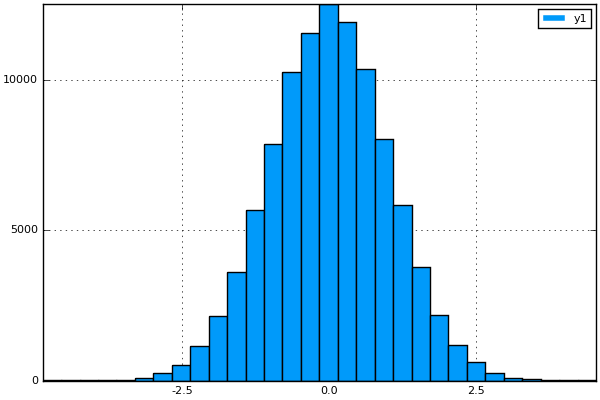

In [12]:
random_numbers=randn(100000);
Plots.histogram(random_numbers) # Usando histogram

* Ejercicio, mostrar la distribucion uniforme en la esfera de Bloch y mostrar como estan los puntos amontonados en los polos: Amaro, no he tenido tiempo de hacer graficas polares, te encargo les muestres esto por fas.

In [13]:
v=randn(1,10)+randn(1,10)im # vector con numeros gaussianos aleatorios

1x10 Array{Complex{Float64},2}:
 0.273642+0.0400073im  1.35108+0.131437im  …  1.02614+0.21786im

In [14]:
v=v/norm(v) # Podemos normalizar el estado dividiendolo por su norma;
@show norm(v) # Puede haber un error por la precision finita de la maquina;

norm(v) = 0.9999999999999999


* Pongamos todo en una función, frecuentemente es útil tener a la mano estados aleatorios.

In [15]:
"""
Esta función crea un estado cuantico aleatorio. La dimension por defecto es 2. 
"""
function random_state(dim=2)
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

random_state (generic function with 2 methods)

In [16]:
?random_state # Se muestra la documentación de la función

search: random_state



Esta función crea un estado cuantico aleatorio. La dimension por defecto es 2. 


In [17]:
v=random_state() # Probando la función sin argumentos

2x1 Array{Complex{Float64},2}:
   0.197863+0.0416794im
 -0.0759635+0.976393im 

In [18]:
v=random_state(20);
v

20x1 Array{Complex{Float64},2}:
 -0.0257281+0.0896994im 
   0.264638+0.150912im  
  -0.156821+0.00035217im
   0.114764+0.202838im  
  -0.208963+0.0444841im 
 -0.0336263+0.126948im  
  -0.189397+0.194196im  
   0.376975+0.0874234im 
  -0.363904-0.136271im  
 -0.0415786+0.0130664im 
   -0.35713-0.0998146im 
  0.0145257+0.0335681im 
  -0.144441-0.00944327im
   0.277826+0.00915205im
  -0.125305-0.00962174im
 -0.0366274+0.131657im  
 -0.0196394-0.196031im  
  0.0642753-0.248143im  
  0.0108155+0.00128805im
 -0.0508347-0.0411951im 

In [19]:
norm(v)

0.9999999999999999

# Qubits y la esfera de Bloch

Un qubit es un sistema de dos niveles. Por lo mismo, vamos a poder representarlo como  
$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$$
donde se tiene la condición de normalización 
$$\langle\psi|\psi\rangle = |\alpha|^2 +|\beta|^2=1.$$
La base $|0\rangle$, $|1\rangle$ es conocida como la base computacional, y será importante cuando generalicemos a muchos qubits. 

Dadas esta condición de normalización, y dado que los estados son _rayos_ sobre el espacio de Hilbert, podemos, sin pérdida de generalidad, hacer el primer coeficiente real. Entonces, podemos elegir la siguiente representación:
$$|\psi\rangle = \cos \frac{\theta}{2} |0\rangle + e^{i \phi} \sin \frac{\theta}{2} |1\rangle.$$
Las coordenadas $\theta$ y $\phi$ corresponden a un punto en el espacio, si usamos coordenadas esféricas, y asumimos que $r=1$. Muchas (quizá todas las) operaciones de un qubit pueden ser descritas en forma transparente usando la esfera de Bloch. 

Una buena introduccion a la esfera de Bloch y en general a todos los temas clásicos de cómputo cuántico, es  
Nielsen, Michael A.; Chuang, Isaac L. (2000). Quantum Computation and Quantum Informatio. Cambridge, UK: Cambridge University Press.



# Coordenadas esféricas

Recordemos que la transformación a coordenadas esféricas es 
\begin{align}
x&=r\sin\theta\cos\phi\\
y&=r\sin\theta\sin\phi\\
z&=r\cos\theta
\end{align}

# Matrices de Pauli

Los operadores más importantes de un qubit son las matrices de Pauli. Estas están definidas como
$$
\sigma_x=
\begin{pmatrix}
  0 & 1 \\
  1 & 0
 \end{pmatrix},\quad
\sigma_y=
\begin{pmatrix}
  0 & -i \\
  i & 0
\end{pmatrix},\quad
\sigma_z=
\begin{pmatrix}
  1 & 0 \\
  0 & -1
\end{pmatrix}. 
$$

In [20]:
sigma_x=[0. 1.; 1. 0.];
sigma_y=[0. -im; im 0];
sigma_z=[1. 0.;0. -1.];
sigmas=Array[sigma_x, sigma_y, sigma_z];

Las matrices de Pauli tiene la propiedad de que su cuadrado es 1 ($\sigma_i^2=1$), su traza es 0 ($tr \sigma_i=0$), son hermíticas y son unitarias. Estas propiedades las estaremos usando.

In [21]:
for iter in eachindex(sigmas)
    sigma=sigmas[iter]
    @show iter
    @show norm(sigma*sigma-eye(2))+norm(sigma*sigma'-eye(2))
    @show trace(sigma)
    @show ishermitian(sigma)
end

iter = 1
norm(sigma * sigma - eye(2)) + norm(sigma * sigma' - eye(2)) = 0.0
trace(sigma) = 0.0
ishermitian(sigma) = true
iter = 2
norm(sigma * sigma - eye(2)) + norm(sigma * sigma' - eye(2)) = 0.0
trace(sigma) = 0.0 + 0.0im
ishermitian(sigma) = true
iter = 3
norm(sigma * sigma - eye(2)) + norm(sigma * sigma' - eye(2)) = 0.0
trace(sigma) = 0.0
ishermitian(sigma) = true


# Un conjunto de formulas útiles

## Los valores esperados de los operadores de Pauli, como puntos en una esfera

Notamos que 
\begin{align}
\langle \psi| \sigma_x |\psi\rangle &=
\bigg(\cos \frac{\theta}{2} \langle0| + e^{-i \phi} \sin \frac{\theta}{2} \langle 1 |\bigg)
\bigg(\cos \frac{\theta}{2} |1\rangle + e^{i \phi} \sin \frac{\theta}{2} |0\rangle\bigg)\\
&= e^{-i \phi} \sin \frac{\theta}{2}\cos \frac{\theta}{2}+e^{i \phi} \sin \frac{\theta}{2}\cos \frac{\theta}{2}\\
&=2\sin \frac{\theta}{2}\cos \frac{\theta}{2}\frac{e^{-i \phi}+e^{i \phi}}{2}\\
&=\sin\theta\cos\phi\\
&=x.
\end{align}

Similarmente, 
$$\langle \psi| \sigma_y |\psi\rangle = 2\sin \frac{\theta}{2}\cos \frac{\theta}{2}\frac{e^{i \phi}-e^{-i \phi}}{2i}
=\sin\theta\sin\phi
=y
$$
y
$$\langle \psi| \sigma_z |\psi\rangle = \cos^2 \frac{\theta}{2}-\sin^2 \frac{\theta}{2}
=\cos\theta
=z.
$$

De esta manera, podemos interpretar el vector tridimensional 
$$\langle\psi|\vec \sigma|\psi\rangle$$
como un punto en una esfera, donde sus coordenadas representan los valores esperados de las matrices de Pauli.

## Proyectores y valores esperados

Derivaremos una formula que nos va a permitir introducir la matriz de densidad. Esta herramienta son los proyectores. Actuan de una manera identica a los proyectores en mecánica cuántica. Es decir, calculan la proyeccion de un vector sobre otro vector. El proyector del estado $|\psi\rangle = \sum_i c_i |i\rangle$ está dado por su producto exterior con el bra $\langle \psi| = \sum_i c_i^* \langle i|$:
\begin{align}
|\psi\rangle\langle \psi| &= \sum_{ij} c_i c_j^*|i\rangle\langle j|
\end{align}
Podemos expresar el valor esperado de un observable cualquiera 
$$
A= \sum_{ij}\alpha_{ij} |i\rangle\langle j|
$$

### ¿Que es un valor esperado?

El valor esperado de $A$ está dado por 
\begin{align}
\langle \psi| A |\psi\rangle &= \langle \psi|\sum_{ij}\alpha_{ij} |i\rangle\langle j|\sum_k c_k |k\rangle\\
 &= \langle \psi|\sum_{ij}\alpha_{ij} c_j|i\rangle \\
 &= \sum_k c_k^* \langle k| \sum_{ij}\alpha_{ij} c_j|i\rangle \\
 &= \sum_{ij} c_i^*\alpha_{ij} c_j.
\end{align}

Notemos que el valor esperado tambien se puede expresar como la traza del observable por el proyector correspondiente al estado:
\begin{align}
\text{tr} |\psi\rangle\langle \psi| A &= \text{tr} \sum_{ij} c_j c_i^* |j\rangle\langle i| \sum_{kl}\alpha_{kl} |k\rangle\langle l|\\
&=\text{tr} \sum_{ijl}c_j c_i^* \alpha_{il}|j\rangle\langle l|\\
&=\text{tr} \sum_{ij}c_j c_i^* \alpha_{ij}\\
\end{align}
por lo que concluimos que 
$$
\langle \psi| A |\psi\rangle = \text{tr} |\psi\rangle\langle \psi| A.
$$
Esto nos permite establecer un lenguaje paralelo para las mediciones, usando proyectores. Vamos a poder generalizar esto mas adeltante a otras matrices de rango mayor. 

In [22]:
function projector(state)
    return state*state'
end

projector (generic function with 1 method)

Los proyectores tienen dos características fundamentales:
* Son idempotentes ($P^2=P$)
* Tienen traza unidad
Estas dos características de hecho definen un proyector.

In [45]:
P=projector(random_state(4));
@show norm(P*P-P);
@show trace(P);

norm(P * P - P) = 7.828646819775571e-17
trace(P) = 0.9999999999999998 + 0.0im


In [23]:
sigmas;
psi=random_state(2);

In [24]:
# Nótese que el valor esperado es real. De que es consecia esto? 
trace(projector(psi)*sigma_x)

0.41578214197803903 + 0.0im

In [25]:
"""
Function that takes a pure 2-level state and returns the Bloch sphere representation
"""
function stateToBloch(psi::Array)
    lista = Float64[]
    for sigma in sigmas
        push!(lista, real(trace(sigma*projector(psi))))
    end
    lista
end

stateToBloch (generic function with 1 method)

In [26]:
stateToBloch(psi)

3-element Array{Float64,1}:
  0.415782
 -0.524947
 -0.742668

Podemos notar que los eigenestados de las matrices de Pauli estan sobre cada uno de los ejes. Por ejemplo, los estados propios de $\sigma_z$ estan en $\pm \hat k$

In [28]:
@show stateToBloch([1., 0.]);
@show stateToBloch([0., 1.]);

stateToBloch([1.0,0.0]) = [0.0,0.0,1.0]
stateToBloch([0.0,1.0]) = [0.0,0.0,-1.0]


In [29]:
for NumeroMatriz in eachindex(sigmas)
    sigma=sigmas[NumeroMatriz]
    λs, vs=eig(sigma)
    for i in eachindex(λs)
        λ=λs[i]
        v=vs[:,i]
        print("Numbero de matriz $(NumeroMatriz), eigenvalor $(λ)\n")
        print("eigenvector [$(v)],\n")
        print("eigenvector [$(stateToBloch(v))]\n\n")
    end
end

Numbero de matriz 1, eigenvalor -1.0
eigenvector [[-0.7071067811865475,0.7071067811865475]],
eigenvector [[-0.9999999999999998,0.0,0.0]]

Numbero de matriz 1, eigenvalor 1.0
eigenvector [[0.7071067811865475,0.7071067811865475]],
eigenvector [[0.9999999999999998,0.0,0.0]]

Numbero de matriz 2, eigenvalor -1.0
eigenvector [Complex{Float64}[0.0 - 0.7071067811865475im,-0.7071067811865475 + 0.0im]],
eigenvector [[0.0,-0.9999999999999998,0.0]]

Numbero de matriz 2, eigenvalor 1.0
eigenvector [Complex{Float64}[0.0 - 0.7071067811865475im,0.7071067811865475 + 0.0im]],
eigenvector [[0.0,0.9999999999999998,0.0]]

Numbero de matriz 3, eigenvalor -1.0
eigenvector [[0.0,-1.0]],
eigenvector [[0.0,0.0,-1.0]]

Numbero de matriz 3, eigenvalor 1.0
eigenvector [[-1.0,-0.0]],
eigenvector [[0.0,0.0,1.0]]



El concepto de matriz de densidad de densidad se usa cuando tenemos una superosición estadístisca de varios estados. En este caso, tenemos cierta probabilidad $p_i$ de tener un estado $|\psi_i\rangle$, entonces la matriz de densidad correspondiente es
$$
\rho = \sum_i p_i |\psi_i\rangle\langle\psi_i|.
$$
La matriz de densidad permite introducir el concepto de ensamble en mecánica cuantica. Tambien permite introducir el concepto de ignorancia, por ejemplo con respecto a una medición. Dos observadores, uno con mas información que otro, van a describir el mismo estado con diferentes objetos matemáticos. Esto nos hace reflexionar acerca de la validez o "realidad" de la función de onda (o de la matriz de densidad). Una cita de Peres es bastante util en este punto:

_Many physicists, perhaps a majority, have an intuitive, realistic worldview and consider a quantum state as a physical entity. Its value may not be known, but in principle the quantum state of a physical system would be well defined. However, there is no experimental evidence whatsoever to support this naive belief. On the contrary, if this view is taken seriously, it may lead to bizarreconsequences,called "quantumparadoxes."_

Los valores esperados se calculan como se explicó arriba, y si antes haciamos la evolución como 
$$
|\psi(t)\rangle= U(t)|\psi(0)\rangle
$$
ahora simplemente la hacemos como 
$$
\rho=U(t)\psi(0)U^\dagger(t)
$$
Los postulados de medición funcionan de manera similar, es decir, en vez de proyectar 
$$
|\psi\rangle \to \propto P_m |\psi\rangle
$$
proyectamos a 
$$
\rho \to \propto P_m\rho P_m.
$$


# Estados aleatorios

Decir que uno tiene un conjunto aleatorio tiene sentido si, ademas de decir cual es ese conjunto, dice uno cual es la medida. Uno puede tener numeros aleatorios de 0 a 1, pero los puede escoger de manera uniforme, o de cualquier otra manera. Claramente ambos casos son diferentes. 

En el caso de estados cuánticos, vamos a escoger estados aleatorios, de tal manera que no depende de la base que usemos para escogerlos. Si tomamos en forma ingenua los estados, podemos ver como se ven en la esfera de Bloch.


In [30]:
e1=stateToBloch(random_state())

3-element Array{Float64,1}:
 -0.615461
 -0.745028
  0.25718 

In [31]:
random_state()

2x1 Array{Complex{Float64},2}:
 -0.361873-0.890483im
  0.233681+0.146566im

In [32]:
NumberOfPoints=2700;
e4=zeros(NumberOfPoints,3);
euniform=zeros(NumberOfPoints,3);

In [35]:
for i=1:NumberOfPoints
    e4[i,:]=stateToBloch(random_state())
end


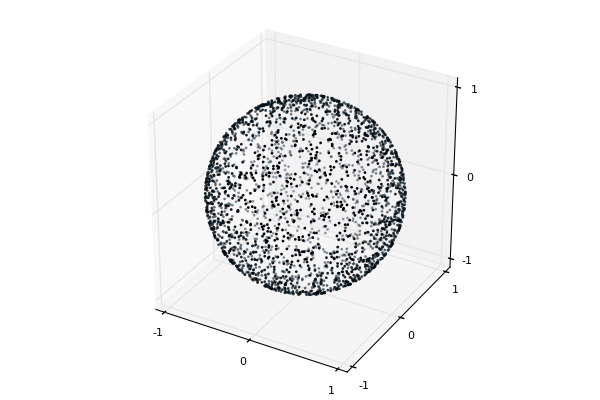

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [36]:
plot(e4[:,1],e4[:,2],e4[:,3],marker=(5,1,stroke(1)),w=0,legend=false,aspectratio=1)

In [37]:
thetas=rand(NumberOfPoints)*π;
phis=rand(NumberOfPoints)*2*π;
PointsUniformDistribution=zeros(NumberOfPoints,3);

for i=1:NumberOfPoints
    euniform[i,:]=[sin(thetas[i])*cos(phis[i]) sin(thetas[i])*sin(phis[i]) cos(thetas[i])]
end


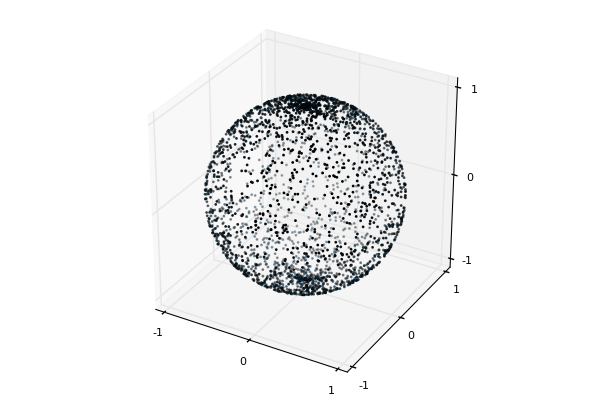

In [39]:
plot(euniform[:,1],euniform[:,2],euniform[:,3],marker=(5,1,stroke(1)),w=0,legend=false,aspectratio=1)

## Sistemas compuestos y traza parcial

Sea $A+B$ un sistema bipartito, y $\mathcal{H}=\mathcal{H}_A\otimes\mathcal{H}_B$ el espacio de Hilbert asociado al mismo. Ahora, sea $|\psi\rangle \in \mathcal{H}_A\otimes\mathcal{H}_B$ un estado puro definido en este espacio, queremos calcular el estado reducido para el subsistema $A$. Para este fin calculamos la _traza parcial_, que basicamente equivale a promediar los grados de libertad de el subsistema $B$ (algo parecido a una distribución marginal, sin olvidar que en mecánica cuántica tenemos el ingrediente extra: las coherencias, es decir, estas codifican el tipo de probabilidad a la que podemos llamar cuántica). 

* Comencemos con la traza parcial de estados puros:

$\rho_A=\text{tr}_B \rho_{\psi}$, donde $\rho_A$ es la matriz de densidad reducida para el subsistema $A$, es decir, es el estado cuántico del sistema $A$ y $\rho_{\psi}$ es el proyector del sistema total, es decir, su matriz de densidad, $\rho_{\psi}=|\psi\rangle\langle\psi|$. Tenemos entonces:

$\rho_A=\text{tr}_B \rho_{\psi}=\sum_{i} \langle i_B | \rho_{\psi} | i_B \rangle$, donde $|\phi_i\rangle$, es una base arbitraria y ortonormal en el espacio $\mathcal{H}_B$, es decir, no importa que base usamos, al igual que la traza total, pero esta vez solo usando elementos de la base de $B$, de ahi el nombre traza parcial.

* Ejercicio: Demostrar que $\rho_A=\sum_{i} \langle i_B | \rho_{\psi} | i_B \rangle= \sum_{i,i',k} c_{i j} c^{*}_{i'j} |i_A \rangle \langle i'_A|$, donde los $c_{ij}$ son las componentes del estado puro: $|\psi\rangle=\sum_{ij}c_{ij}|i_Aj_B\rangle$

En el caso de un sistema bipartito de dimensión 4, la traza parcial se calcula de la siguiente forma:

In [ ]:
ρ=proyector(random_state(4))

In [ ]:
ρ_A=Array([[ρ[1,1]+ρ[2,2] ρ[1,3]+ρ[2,4]
        ];[ρ[3,1]+ρ[4,2] ρ[3,3]+ρ[4,4]]]) #Usando dos indices#

In [ ]:
trace(ρ_A)

In [ ]:
ishermitian(ρ_A)

* Traza parcial de estados puros para sistemas bipartitos de $N\times M$. Aqui no es necesario recurrir a una indexación especial, solo tener cuidado con las componentes. La idea es calcular la traza parcial del subsistema $A$ o $B$ directamente del estado puro, sin tener que calcular su proyector. Representando los elementos de la base bipartita como sigue:

$|11\rangle \to \left( \begin{array}{c} 1 \\ \vdots \\ 0 \end{array} \right)$, $|12\rangle \to \left( \begin{array}{c} 0 \\ 1 \\ \vdots \end{array} \right)$, etc. De tal forma que:

$|\psi\rangle \to \left( \begin{array}{c} c_{11} \\ c_{12} \\ \vdots \\ c_{NM} \end{array} \right)$

* Ejercicio: Como indexamos esto con Julia?, de tal forma que 
    $|\psi\rangle \to \left( \begin{array}{c} \psi_{1} \\ \psi_2 \\ \vdots \\ \psi_k \\ \vdots \\ \psi_{N\times M} \end{array} \right)$

Respuesta, el chiste es que digan: $(i,j)\to (i-1)M+j=k$
* Ejercicio: Utilizando esto, hacer una rutina que calcule la traza parcial de los subsistemas $A$ y $B$ para un estado puro de dimensión $N \times M$:
    
Algo asi: $ \left(\rho_A \right)_{ii'} = \sum_k \psi_{(i-1)M+k} \psi^{*}_{(i'-1)M+k} $

y $ \left(\rho_B \right)_{ii'} = \sum_k \psi_{(k-1)M+i} \psi^{*}_{(k-1)M+i'} $


## Tarea

* Pensar en una generalizacion de la esfera de Bloch para un qutrit (sistema de 3 niveles) y para un sistema de dos qubits. Programar una rutina que efectue dicho calculo. 

* Compare el calculo de la traza de un operador hermitico aleatorio exacto con el valor esperado con respecto a un solo estado aleatorio:
  * Construya un operador aleatorio hermítico, partiendo de un arreglo de $n\times n$ de números aleatorios complejos (sea esa matriz $A$). El observable a usar será $H=A+A^\dagger$ (muestre numérica que efectivamente es hermítico.
  * Use un estado aleatorio de la dimension correspondiente para calcular el valor esperado.
  * Compare con el valor de $\text{tr} H$. Debe ser muy cercano, cuando lo dividimos por la dimension del sistema. 
  * Calcule la diferencia como función de la dimensión del sistema y grafiquelo. 
  * Repita el ejercicio para una familia de operadores que varien con la dimensión pero que sean acotados (el espectro debe permanecer acotado a medida que la dimensión aumenta).



# Por hacer para la siguiente iteracion:
* Hacer demostracion numerica en 2 dimensiones que la forma de tomar direcciones aleatorias usando variables gaussianas y usando variables uniformes no da lo mismo. 
* Pensar si hacemos type_stable ahora, o quizá más adelante.
* Pensar si realmente vale la pena hacer que los arreglos sean de 1xn o mejor de nx1 para los estados aleatorios